In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [2]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress',
               'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

# Se espera un tensor 3D, así que se le agrega una dimensión más
# Además se normalizan los valores de 0,1
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

model = Sequential()

model.add(Conv2D(32,(5,5),activation='relu',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
from keras.losses import SparseCategoricalCrossentropy

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

model.fit(train_images, train_labels, epochs=5)

test_loss,test_acc = model.evaluate(test_images, test_labels)
print("test accuracy: ",test_acc)

Epoch 1/5
1875/1875 [==============================] - 17s 3ms/step - loss: 0.8377 - accuracy: 0.7020
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5205 - accuracy: 0.8146
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4537 - accuracy: 0.8390
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4163 - accuracy: 0.8520
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.8410
test accuracy:  0.8410000205039978


In [ ]:
# ==================================
# === Mejorando la red cambiando ===
# ======== HIPERPARÁMETROS =========
# ==================================

model2 = Sequential()

model2.add(Conv2D(64,(7,7),activation='relu', padding='same',
                  input_shape=(28,28,1)))
model2.add(MaxPooling2D())
model2.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(10,activation='softmax'))

# En este modelo se añade el doble de neuronas en las capas convolucionales
# y se añade una capa densa antes del clasificador final

In [ ]:
# Se utiliza el optimizador Adam, que se comporta mucho mejor que el sgd
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Mejora considerablemente el modelo

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4130 - accuracy: 0.8514
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2688 - accuracy: 0.9008
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2281 - accuracy: 0.9152
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1973 - accuracy: 0.9270
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.2634 - accuracy: 0.9095
Test accuracy: 0.909500002861023


In [ ]:
predictions = model2.predict(test_images)
#print(predictions)

313/313 [==============================] - 1s 2ms/step


In [ ]:
import matplotlib.pyplot as plt

def plot_image(i,predictions_array,true_label,img):
  predictions_array,true_label,img = predictions_array,true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img,cmap='binary')

  predicted_label = np.argmax(predictions_array)
  if predicted_label ==true_label:
    color='g'
  else:
    color='r'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color=color))

def plot_value_array(i,predictions_array,true_label):
  predictions_array, true_label = predictions_array, true_label[i]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10),predictions_array,color='b')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('r')
  thisplot[true_label].set_color('g')


In [ ]:
# Volvemos las imágenes a formato original para hacer el plot
train_images = train_images.reshape((60000,28,28))
train_images = test_images.reshape((10000,28,28))

ValueError: ignored

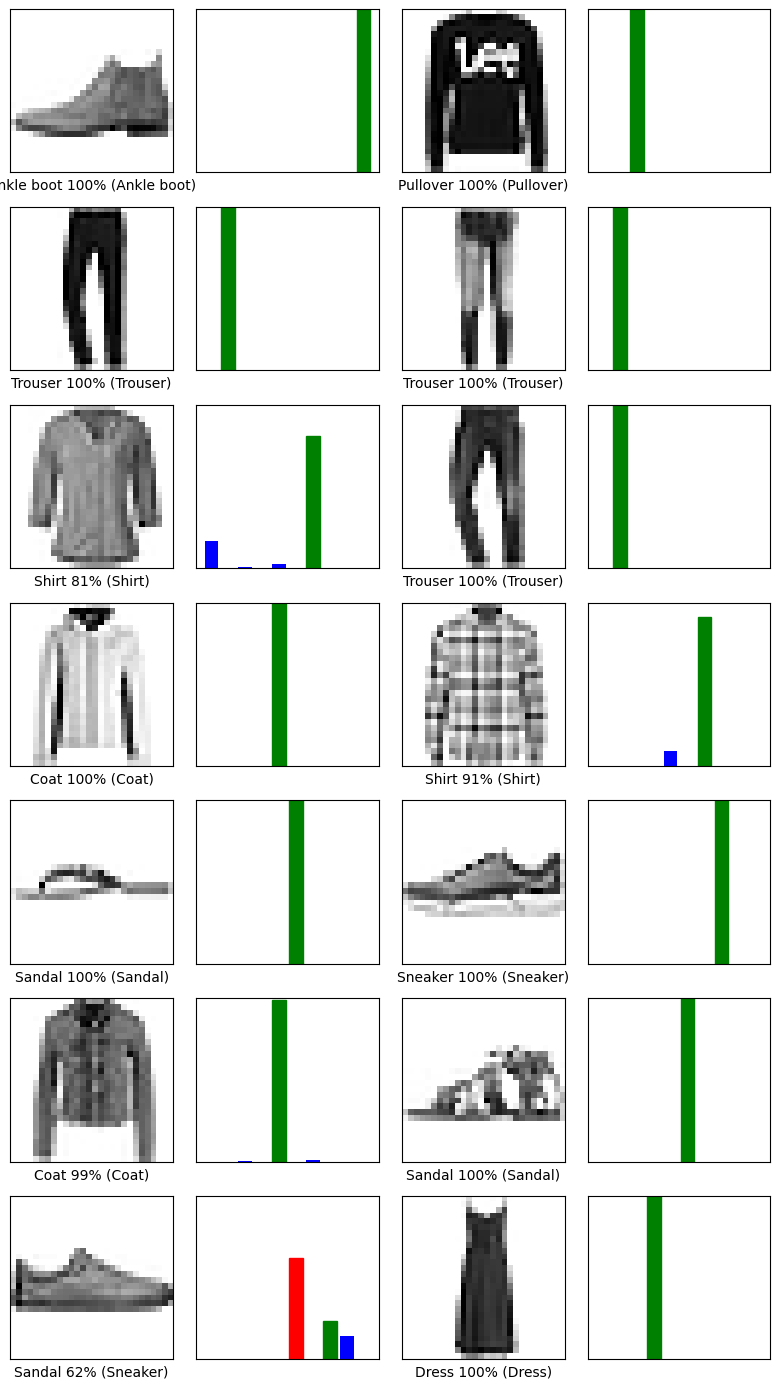

In [ ]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [ ]:
# ========================================
# === Mejorando el modelo con capas de ===
# ===== DropOut y BatchNormalization =====
# ========================================

# Regresamos los tensores a 3D
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

In [ ]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():

  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=(3,3),
                   activation='relu',strides=1,
                   padding='same',input_shape=(28,28,1)))
  model.add(BatchNormalization())
  # Filters - Filtros
  # kernel_size - tamaño de la ventana
  # stride - tamaño del paso de la ventana
  # padding - tamaño del resultado de los filtros

  model.add(Conv2D(filters=32,kernel_size=(3,3),
                   activation='relu',strides=1,
                   padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64,kernel_size=(3,3),
                   activation='relu',strides=1,
                   padding='same'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=128,kernel_size=(3,3),
                   strides=1,activation='relu',
                   padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10,activation='softmax'))

  return model

  # La capa BatchNormalization normaliza las entradas de la capa de tal manera
  # que tengan una activación de salida media de cero y una desviación estándar de uno.
  # Esto es un análogo a cómo se estandarizan las entradas a las redes

  # La capa Dropout, aplica una de las técnicas más usadas apra ayudar a mitigar el sobreajuste de modelos i
  # Se basa en ignorar ciertos conjuntos de neuronas de la red durante la fase de entrenamiento
  # de manera aleatoria. Por "ignorar", nos referimos a que estas neuronas no se
  # consideran durante una iteración conreta del proceso de aprendizaje


In [ ]:
from keras.losses import SparseCategoricalCrossentropy

model3 = make_model()

model3.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'],
               optimizer='adam')

model3.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print("Test_accuracy: ",test_acc)


Epoch 1/5
1875/1875 [==============================] - 26s 11ms/step - loss: 0.5014 - accuracy: 0.8282
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3130 - accuracy: 0.8902
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2741 - accuracy: 0.9029
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2448 - accuracy: 0.9134
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Test_accuracy:  0.0


In [ ]:
# ==============================
# === Deacaimiento del ratio ===
# ===     de aprendizaje     ===
# ==============================

# Hay que recordar que el radio de aprendizaje no debe ser muy alto para
# para dar pasos grandes, ni demasiado pequeño, pues no alteraría los pesos
# y los sesgos.

# Keras proporciona el callback LearningRateScheduler, que toma la función de
# disminución de pasos como argumento y devuelve las tasas de aprendizaje actualizadas
# para usar en el optimizador en cada epoch

model4 = make_model()
optimizer = tf.keras.optimizers.Adam(lr=0.001) # learning rate = 0.001
model4.compile(optimizer = 'adam',
              metrics = ['accuracy'],
              loss = 'sparse_categorical_crossentropy')

reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3*0.9**x)

model4.fit(train_images,train_labels, epochs=20,callbacks=[reduce_lr])

test_loss, test_acc = model4.evaluate(test_images,test_labels)
print("Test accuracy: ", test_acc)

# Un callback es una herramienta para personalizar el comportamiento de un modelo
# durante el entrenamiento, evaluación o inferenica del modelo Keras
# Hay varios disponibles, como el LearningRateScheduler o el ModelCheckpoint

Epoch 1/20
1875/1875 [==============================] - 23s 10ms/step - loss: 0.4973 - accuracy: 0.8275 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3104 - accuracy: 0.8904 - lr: 9.0000e-04
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2674 - accuracy: 0.9058 - lr: 8.1000e-04
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2322 - accuracy: 0.9175 - lr: 7.2900e-04
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2086 - accuracy: 0.9260 - lr: 6.5610e-04
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1911 - accuracy: 0.9321 - lr: 5.9049e-04
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1684 - accuracy: 0.9393 - lr: 5.3144e-04
Epoch 8/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1485 - accuracy: 0.9464 - lr: 4.7830e-04
Epoch 9/20
1875/1875 [==============

313/313 [==============================] - 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

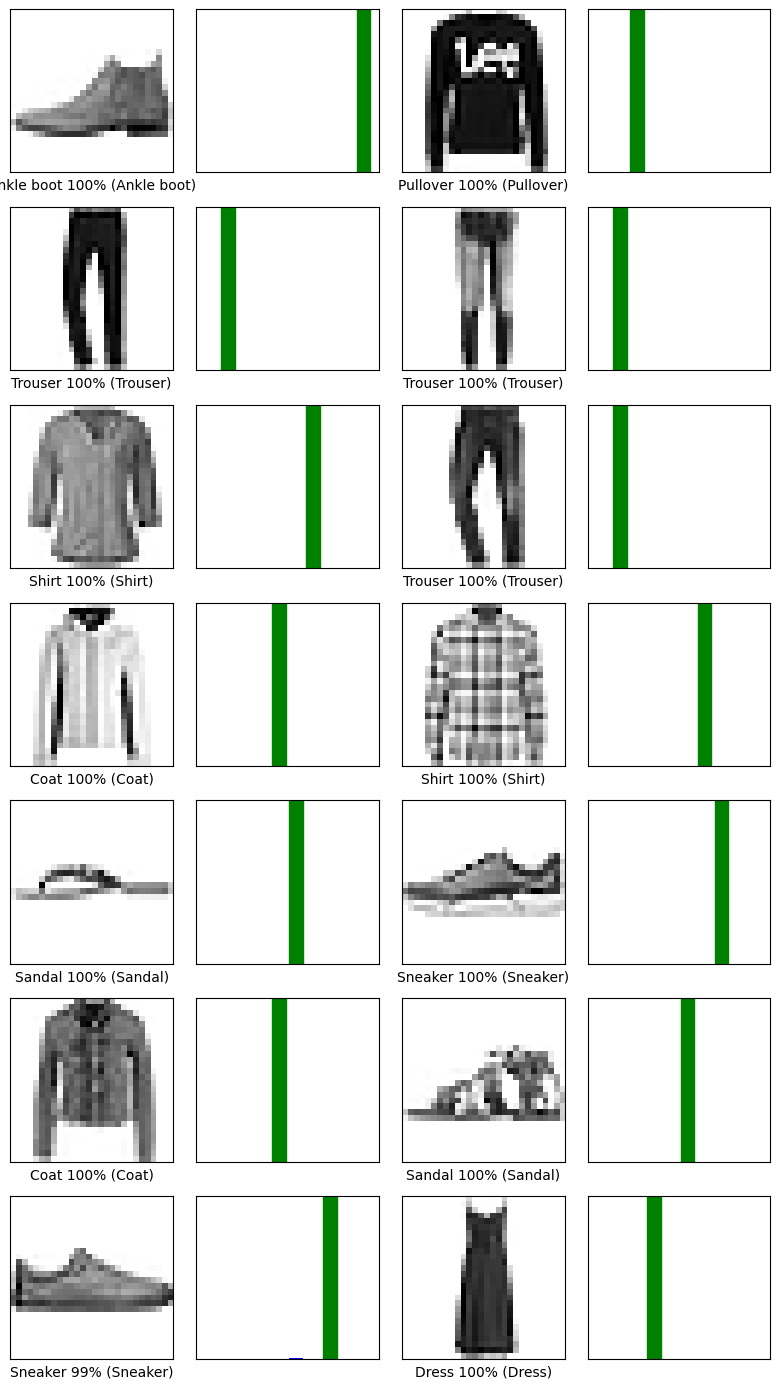

In [ ]:
predictions = model4.predict(test_images)

train_images = train_images.reshape(60000,28,28)
test_images = test_images.reshape(10000,28,28)

num_rows=7
num_cols=2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,predictions[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show